## Title - Paddy Disease Detection using CNN

- Author: [Muhammad Haroon ul Hasnain](https://www.kaggle.com/haroon669)
- Linkedin: [Muhammad Haroon ul Hasnain](https://www.linkedin.com/in/muhammad-haroon-ul-hasnain/)
- Github: [hasnain1669](https://github.com/hasnain1669)
- Kaggle: [haroon669](https://www.kaggle.com/haroon669)
- Twitter: [hasnain669](https://twitter.com/hasnain1669)\
`Date:` 29 Jan 2024\
`Dataset:` [Paddy Disease Detection - using CNN](https://www.kaggle.com/competitions/paddy-disease-classification/leaderboard)

Problem Statement
Rice (Oryza sativa) is one of the staple foods worldwide. Paddy, the raw grain before removal of husk, is cultivated in tropical climates, mainly in Asian countries. Paddy cultivation requires consistent supervision because several diseases and pests might affect the paddy crops, leading to up to 70% yield loss. Expert supervision is usually necessary to mitigate these diseases and prevent crop loss. With the limited availability of crop protection experts, manual disease diagnosis is tedious and expensive. Thus, it is increasingly important to automate the disease identification process by leveraging computer vision-based techniques that achieved promising results in various domains.

Objective
The main objective of this notebook is to develop a CNN model to classify the given paddy leaf images accurately. We provide a training dataset of 10,407 (75%) labeled images across ten classes (nine disease categories and normal leaf). Moreover, we also provide additional metadata for each image, such as the paddy variety and age. Your task is to classify each paddy image in the given test dataset of 3,469 (25%) images into one of the nine disease categories or a normal leaf.

In [140]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [141]:
# importing the dataset, checking the first 5 rows and the shape of the dataset
df_train = pd.read_csv('train.csv')
df_train.head(), df_train.shape

(     image_id                  label variety  age
 0  100330.jpg  bacterial_leaf_blight   ADT45   45
 1  100365.jpg  bacterial_leaf_blight   ADT45   45
 2  100382.jpg  bacterial_leaf_blight   ADT45   45
 3  100632.jpg  bacterial_leaf_blight   ADT45   45
 4  101918.jpg  bacterial_leaf_blight   ADT45   45,
 (10407, 4))

In [142]:
# checking the unique values of label in the dataset
df_train['label'].unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [143]:
# checking the unique values of variety in the dataset
df_train['variety'].unique()

array(['ADT45', 'IR20', 'KarnatakaPonni', 'Onthanel', 'Ponni', 'Surya',
       'Zonal', 'AndraPonni', 'AtchayaPonni', 'RR'], dtype=object)

In [144]:
# checking the count of each unique value of label in the dataset
df_train['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [145]:
# checking the count of each unique value of variety in the dataset
df_train['variety'].value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [146]:
# let's check the statistical summary of the dataset
df_train.describe()

age
count  10407.000000
mean      64.043624
std        8.958830
min       45.000000
25%       60.000000
50%       67.000000
75%       70.000000
max       82.000000

<Axes: xlabel='count', ylabel='label'>

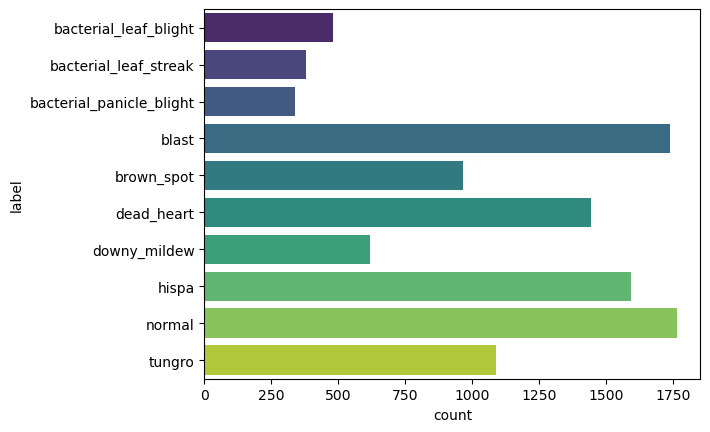

In [147]:
# plot the count of each unique value of label in the dataset
sns.countplot(df_train['label'], label='counts of each label', palette='viridis')

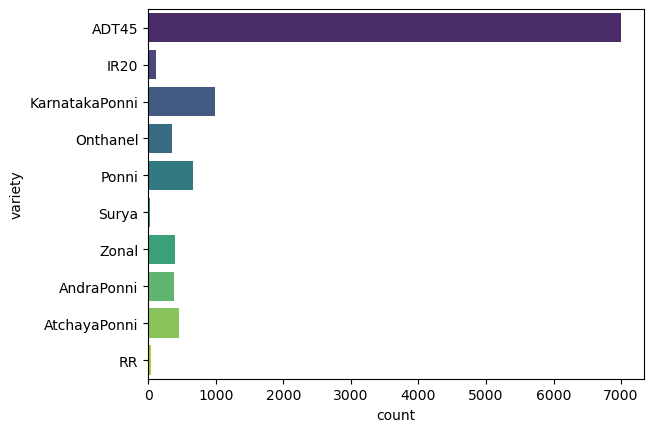

In [148]:
# plot the count of each unique value of variety in the dataset
ax = sns.countplot(df_train['variety'], label='counts of each variety', palette='viridis')


In [149]:
# Lets Filter the label column based on Normal
normal=df_train[df_train['label']=='normal']
normal=normal[normal['variety']=='ADT45']
five_normal=normal.image_id[:5].values
five_normal.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [150]:
# Lets Filter the label column based on dead_heart
dead=df_train[df_train['label']=='dead_heart']
dead=dead[dead['variety']=='ADT45']
five_dead=dead.image_id[:5].values
five_dead.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

In [151]:
# encoding the label and variety columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_train['variety'] = label_encoder.fit_transform(df_train['variety'])

# checking the first 5 rows of the dataset
df_train.head()

image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

<Axes: >

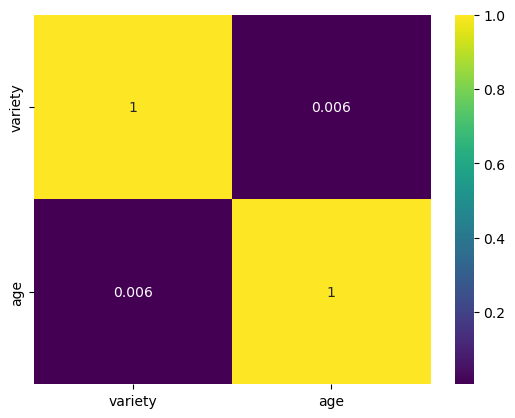

In [152]:
# Let's check the correlation of the features
sns.heatmap(df_train[['variety', 'age']].corr(), annot=True, cmap='viridis')


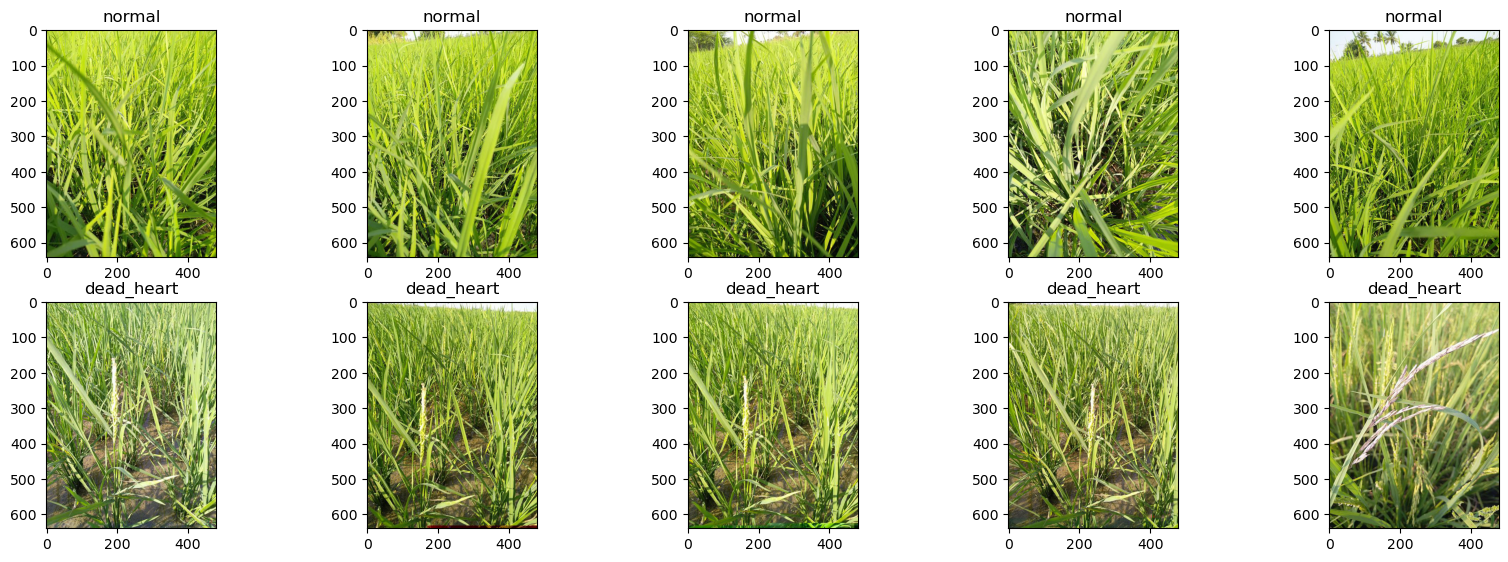

In [153]:
# let's have a look of images of the dataset
plt.figure(figsize=(20,10))
columns=5
path='train_images/'
for i, image_loc in enumerate(np.concatenate((five_normal, five_dead))):
    plt.subplot(10//columns + 1, columns, i+1)
    
    if i<5:
        
        image=plt.imread(path+'normal/'+image_loc)
        plt.title('normal')
    else:
        image=plt.imread(path+'dead_heart/'+image_loc)
        plt.title('dead_heart')

    plt.imshow(image)  

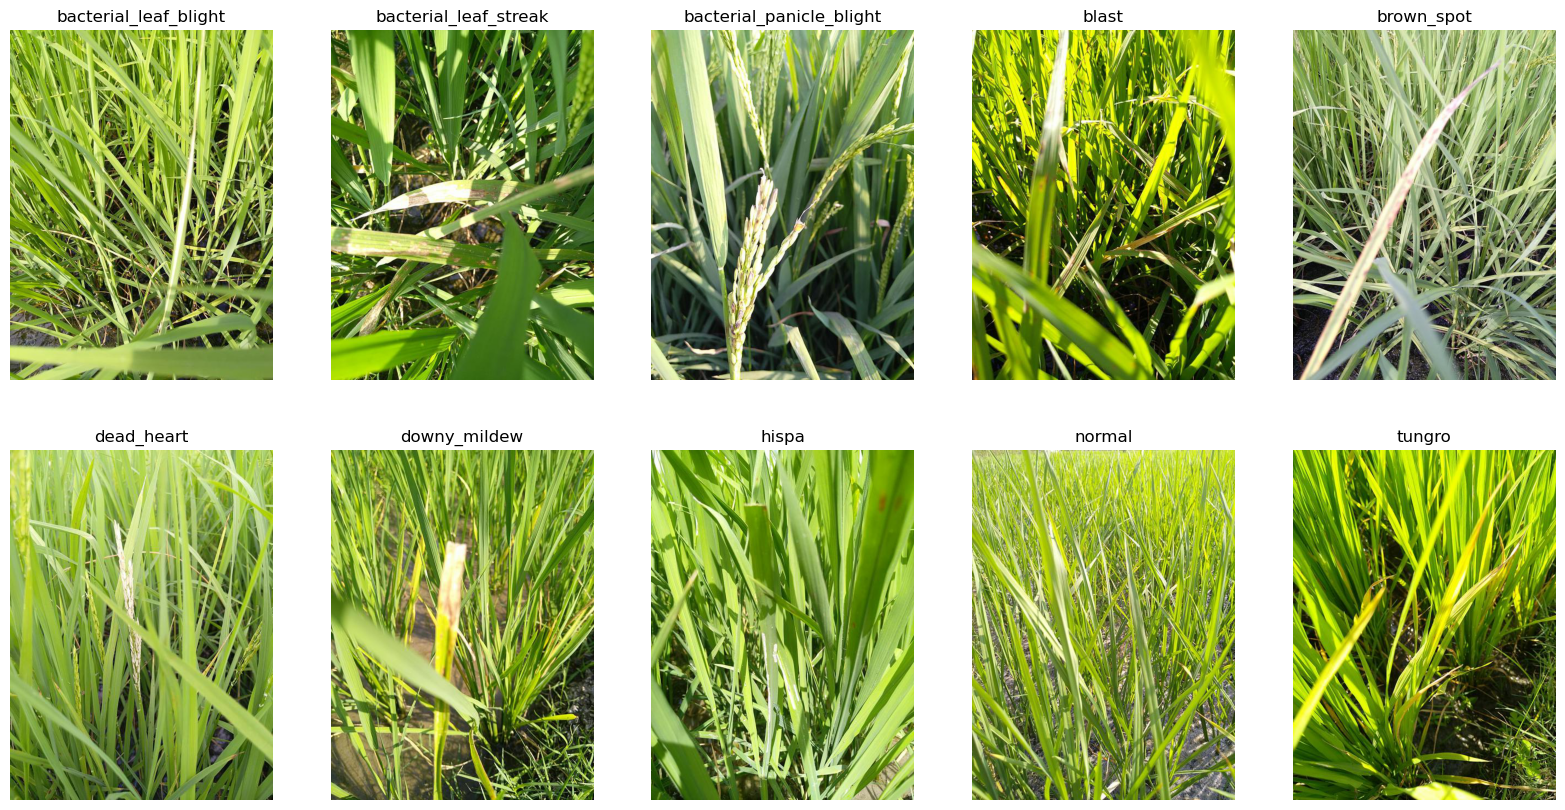

In [154]:
# images from the all labels in the dataset
images = ['./train_images/bacterial_leaf_blight/100023.jpg', 
          './train_images/bacterial_leaf_streak/100042.jpg',
          './train_images/bacterial_panicle_blight/100043.jpg',
          './train_images/blast/100004.jpg',
          './train_images/brown_spot/100001.jpg',
          './train_images/dead_heart/100008.jpg',
          './train_images/downy_mildew/100017.jpg',
          './train_images/hispa/100003.jpg',
          './train_images/normal/100002.jpg',
          './train_images/tungro/100011.jpg']
diseases = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 
            'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    img = plt.imread(images[i])
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(diseases[i])
    ax[i//5, i%5].axis('off')
plt.show()


In [155]:
# defining the parameters
batch_size = 32
img_height = 180
img_width = 180

# path to the dataset
path = 'train_images/'

In [156]:
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    path, 
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [157]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path, 
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [158]:
# names of the classes
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [159]:
# shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 180, 180, 3)
Shape of y_train:  (32,)


In [160]:
# normalization layer of the dataset
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [161]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebles_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# shape of the images dataset
print("Minimum Value = ", np.min(first_image), "\nMaximum Value = ", np.max(first_image))

Minimum Value =  0.0 
Maximum Value =  1.0


In [162]:
#Auto-tuning
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [163]:
num_classes = len(class_names)
num_classes

10

In [164]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [168]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [169]:
%%time
# early stopping
earlystopping = EarlyStopping(patience=3, restore_best_weights=True)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[earlystopping])

# evaluat the model
loss, accuracy = model.evaluate(val_ds)

Epoch 1/100


261/261 [==============================] - 204s 774ms/step - loss: 1.9530 - accuracy: 0.3001 - val_loss: 1.6409 - val_accuracy: 0.4358
Epoch 2/100
261/261 [==============================] - 182s 698ms/step - loss: 1.3908 - accuracy: 0.5285 - val_loss: 1.3208 - val_accuracy: 0.5416
Epoch 3/100
261/261 [==============================] - 182s 696ms/step - loss: 0.9030 - accuracy: 0.7024 - val_loss: 1.0142 - val_accuracy: 0.6997
Epoch 4/100
261/261 [==============================] - 180s 691ms/step - loss: 0.5709 - accuracy: 0.8124 - val_loss: 0.8099 - val_accuracy: 0.7799
Epoch 5/100
261/261 [==============================] - 179s 687ms/step - loss: 0.3754 - accuracy: 0.8799 - val_loss: 0.8021 - val_accuracy: 0.7751
Epoch 6/100
261/261 [==============================] - 181s 692ms/step - loss: 0.2952 - accuracy: 0.9026 - val_loss: 0.7968 - val_accuracy: 0.8015
Epoch 7/100
261/261 [==============================] - 183s 701ms/step - loss: 0.2030 - accuracy: 0.9349 - val_loss: 0.7856 - val_

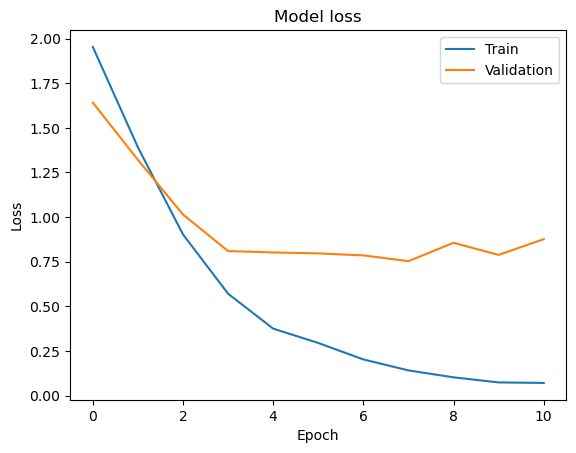

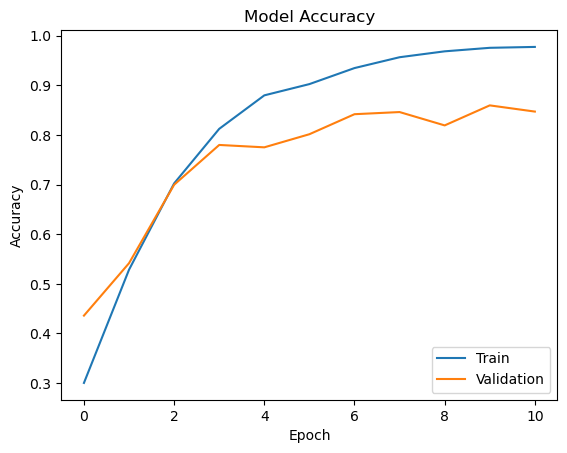

In [183]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [194]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'test_images',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode=None,
    shuffle=False)

Found 3469 files belonging to 1 classes.


In [195]:
y_pred =  model.predict(test_ds)

109/109 [==============================] - 17s 156ms/step


In [196]:
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

array([8, 8, 3, ..., 8, 6, 5], dtype=int64)

In [198]:
submission_classes = [class_names[x] for x in y_pred_classes]

In [200]:
submit = pd.read_csv('sample_submission.csv')

In [201]:
submit['label'] = submission_classes[:len(submit)]
submit.to_csv('submission.csv', index=False)

## Observations:
- The dataset has 10,407 images for training and 3,469 images for testing.
- The dataset has 10 classes, 9 disease categories and 1 normal leaf.
- The dataset has 2 additional metadata columns, `Variety` and `Age`.
- The age of the paddy leaf is in days 45 to 82.
- The most of the images are of the ADT45 variety, and the least are of the Surya variety.
- The correlation between the age and the variety is very low.
- All the images are abosultely different from each other. 
- The dataset has 8326 images of the training set and 2081 images of the testing set.
- Accuracy of the model is 0.95 on the training set and 0.94 on the testing set.